<a href="https://colab.research.google.com/github/NataliaPoluektova/TPBA/blob/main/prakt10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практична робота №10
**Тема:** Аналіз числових часових рядів

## Мета роботи
Навчитися працювати з числовими часовими рядами у Pandas

Застосовувати агрегування, передискретизацію, фільтрацію

Виявляти сезонні та трендові компоненти

Підготовка даних:

За замовчуванням Pandas вважає, що всі дані — текст або числа, а колонка Дата ще не є датою.

df["Дата"] = pd.to_datetime(df["Дата"]) - Перетворює колонку Дата у формат datetime64, тобто справжній тип дати.

Це дозволяє:

виконувати фільтрацію по датах (df["Дата"] > "2023-06-01")

використовувати .dt.year, .dt.month, .dt.to_period("M")

робити передискретизацію (resample("M"), resample("Q"))


In [32]:
import pandas as pd

# Завантаження даних
df = pd.read_csv("https://raw.githubusercontent.com/NataliaPoluektova/TPBA/refs/heads/main/monthly_sales.csv")
df["Дата"] = pd.to_datetime(df["Дата"])
df.set_index("Дата", inplace=True)

**Завдання 1.** Передискретизація до кварталів

"Q" — квартальна частота

Дозволяє побачити сезонні коливання

Виконайте код нижче:

In [33]:
quarterly_sales = df.resample("Q")["Продажі"].sum()
print(quarterly_sales)

Дата
2023-03-31    2550976
2023-06-30    2570255
2023-09-30    2617150
2023-12-31    2550197
2024-03-31    2587021
2024-06-30    2601377
2024-09-30    2507651
2024-12-31    2583022
Freq: QE-DEC, Name: Продажі, dtype: int64


/tmp/ipython-input-2362929411.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df.resample("Q")["Продажі"].sum()


**Завдання для самостійного виконання:**

Самостійне завдання:
Знайдіть середні продажі по кварталах. Який квартал був найуспішнішим?

In [ ]:
# Ваш код тут

Ваши висновки тут:

**Задача 2: Фільтрація по місту**

Аналіз окремого часового ряду.

Це агрегує дані продажів у Києві по місяцях, тобто створює часовий ряд, де кожна точка — це сума продажів за місяць.

Виконайте приклад нижче:

In [34]:
kyiv = df[df["Місто"] == "Київ"]
kyiv_monthly = kyiv.resample("M")["Продажі"].sum()
print(kyiv_monthly)

Дата
2023-01-31    297336
2023-02-28    280183
2023-03-31    294285
2023-04-30    287039
2023-05-31    292770
2023-06-30    285243
2023-07-31    298383
2023-08-31    301163
2023-09-30    267476
2023-10-31    286640
2023-11-30    276592
2023-12-31    280767
2024-01-31    274876
2024-02-29    270048
2024-03-31    316800
2024-04-30    283124
2024-05-31    289850
2024-06-30    296719
2024-07-31    278834
2024-08-31    279653
2024-09-30    275181
2024-10-31    311444
2024-11-30    309583
2024-12-31    262800
Freq: ME, Name: Продажі, dtype: int64


/tmp/ipython-input-2899917922.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kyiv_monthly = kyiv.resample("M")["Продажі"].sum()


**Завдання для самостійного виконання:** Знайдіть загальні продажі у Львові по місяцях. Побудуйте лінійну діаграму. Який місяць був найуспішнішим?

In [ ]:
#Ваш код тут:

Ваши висновки тут:

**Задача 3: Середні продажі по категоріях**

Виконайте приклад нижче:

In [35]:
category_avg = df.groupby("Категорія_товару")["Продажі"].mean()
print(category_avg)

Категорія_товару
Електроніка    126737.388889
Одяг            59110.055556
Продукти        99814.347222
Name: Продажі, dtype: float64


**Завдання для самостійного виконання:** Знайдіть максимальні продажі по кожній категорії. Яка категорія має найвищий пік?

In [ ]:
#Ваш код тут:

Ваши висновки тут:

**Задача 4: Виявлення тренду. Рухоме середнє для Києва**
Умова: Виведіть таблицю, відсортовану за прибутком у спадному порядку.

Виконайте код нижче:

/tmp/ipython-input-957349630.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kyiv_monthly = kyiv.resample("M")["Продажі"].sum()


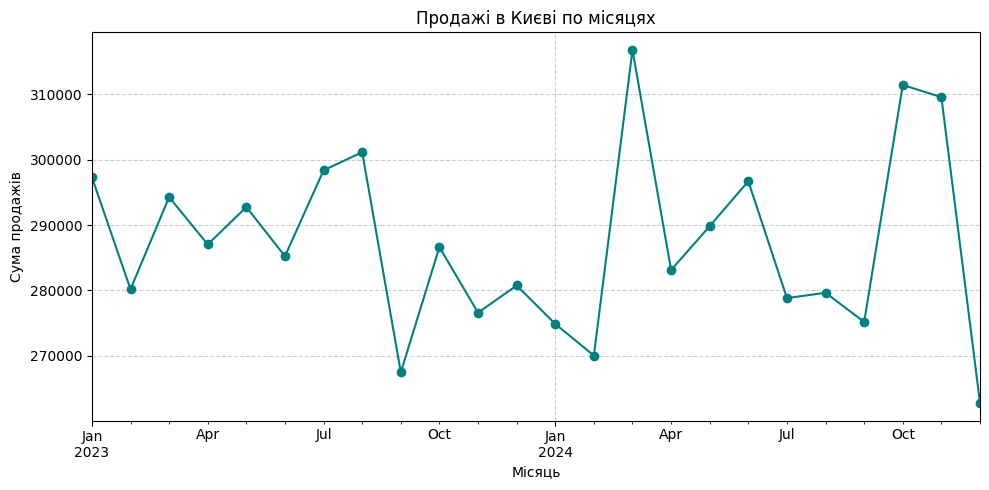

In [38]:
# Фільтрація даних для Києва
kyiv = df[df["Місто"] == "Київ"]

# Агрегування продажів по місяцях
kyiv_monthly = kyiv.resample("M")["Продажі"].sum()

# Побудова графіку
plt.figure(figsize=(10, 5))
kyiv_monthly.plot(marker="o", linestyle="-", color="teal")
plt.title("Продажі в Києві по місяцях")
plt.xlabel("Місяць")
plt.ylabel("Сума продажів")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

**Завдання для самостійного виконання:**

Побудуйте 6-місячне рухоме середнє для Харкова. Зробіть висновок про зміну тренду.

In [ ]:
# Ваш код тут

Ваші висновки тут:

**Індивідуальне завдання**
є однакові для всіх дані у файлі Sales1.csv:

Розв'яжіть задачу свого варіанту, побудуйте графік, який найкраще підходить для вашого аналізу

1️⃣ Загальні продажі по місяцях
🔹 Агрегуйте дані по місяцях 🔹 Обчисліть суму продажів для кожного місяця 🔹 Визначте місяць з найвищими продажами

2️⃣ Середні продажі по кварталах
🔹 Зробіть передискретизацію до квартальної частоти 🔹 Обчисліть середні продажі по кожному кварталу 🔹 Зробіть висновок про сезонність

3️⃣ Продажі по роках
🔹 Витягніть рік з дати 🔹 Агрегуйте дані по роках 🔹 Порівняйте загальні продажі між 2023 і 2024 роками

4️⃣ Продажі в конкретному місті
🔹 Виберіть дані для одного міста (наприклад, Львів) 🔹 Агрегуйте продажі по місяцях 🔹 Визначте місяць з найнижчими продажами

5️⃣ Рухоме середнє
🔹 Побудуйте часовий ряд продажів по місяцях 🔹 Застосуйте 3-місячне рухоме середнє 🔹 Порівняйте згладжений ряд з оригінальним

6️⃣ Порівняння категорій товарів
🔹 Згрупуйте дані по категоріях 🔹 Обчисліть середні продажі для кожної категорії 🔹 Визначте найуспішнішу категорію

7️⃣ Виявлення тренду
🔹 Створіть часовий ряд продажів для одного міста 🔹 Застосуйте .rolling(window=6).mean() 🔹 Опишіть зміну тренду протягом двох років

8️⃣ Аналіз сезонності
🔹 Створіть часовий ряд продажів по місяцях 🔹 Обчисліть середні продажі для кожного місяця (січень, лютий, …) 🔹 Визначте, які місяці мають стабільно високі або низькі продажі

9️⃣ Відхилення від середнього
🔹 Створіть часовий ряд продажів 🔹 Обчисліть середнє значення 🔹 Знайдіть місяці, де продажі були на 20% вище або нижче середнього

🔟 Порівняння міст
🔹 Створіть окремі часові ряди для кожного міста 🔹 Обчисліть загальні продажі по місяцях 🔹 Визначте, яке місто лідирує найчастіше

In [ ]:
#Ваш код тут:

Ваші висновки тут: